In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [381]:
# Load Arun's file
hier = pd.read_csv('../s2ds19_AZ/data/interim/disease_parent.csv')

# Construct whole Hierachical tree (Arrow from parent to daughter)
g=nx.from_pandas_edgelist(hier, source='Parent_TreeNumber', target='Diease_TreeNumber', create_using=nx.DiGraph)

# Save as pickle
nx.write_gpickle(g, "Hierarchy_Tree.pkl")

In [382]:
# Read tre from pickle
g = nx.read_gpickle("Hierarchy_Tree.pkl")

In [412]:
# Define window-size
window = 2*np.pi/25
eps = window/10

In [413]:
# Read tree_id of desired node
node = 'C16.320'

# Save it as the first node of the subgraph
neigh = {node:(0.0,0.0)}

In [414]:
# Compute all of its successos
succ = list(g.successors(node))

# Calculate the positions of all its successors
angle = np.linspace(window+eps, 2*np.pi-window-eps, len(succ))
radius = np.ones(len(succ))
x_pos, y_pos = radius*np.cos(angle), radius*np.sin(angle)

# Add to subgraph
for k, v in dict(zip(succ, zip(x_pos,y_pos))).items():
    neigh[k]=v

In [431]:
# Compute all predecessors
pred = list(g.predecessors(node))

# Compute predecessors positions
if len(pred)==1:
    angle = +eps
else:
    angle = np.linspace(2*np.pi-window+eps, window-eps, len(succ))
radius = 3*np.ones(len(succ))
x_pos, y_pos = radius*np.cos(angle), radius*np.sin(angle)

# Add to subgraph
for k,v in dict(zip(pred, zip(x_pos,y_pos))).items():
    neigh[k]=v
    

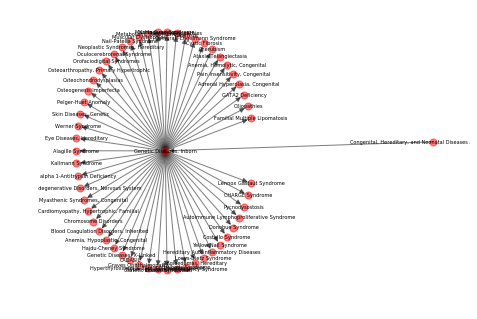

In [436]:
# Get labels of all nodes in subgraph
all_labels_df = pd.read_pickle('../s2ds19_AZ/data/final/id_name_tree_without_SCR.pkl')
all_labels = labels_df[['mesh_treenumbers','mesh_heading']].set_index('mesh_treenumbers').to_dict()['mesh_heading']
my_labels = dict((k,all_labels[k]) for k in neigh.keys() if k in all_labels)

# Draw subgraph
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
#axes.set_xlim(-1.1*,3)
#axes.set_ylim(-1.2,1.2)
g_sub = g.subgraph(neigh)
nx.draw_networkx_labels(g_sub, pos=neigh, labels=my_labels, font_size=5)
nx.draw_networkx(g_sub, pos=neigh, with_labels=False, node_size=50, alpha=0.5)
plt.axis('off')
plt.show()

# Save as pdf
fig.savefig("Sub_Hierarchy_Tree.pdf", bbox_inches='tight')